In [1]:
import numpy as np
#For reading data from CSV
import pandas as pd
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
#for loading data into pytorch model
from torch.utils.data import TensorDataset, DataLoader
#data preprocessing and splitting
from sklearn.model_selection import train_test_split
#Performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score
#defining model
import torch.nn.functional as F
import torch
from torch import optim
import torch
import torch.nn as nn

# Importing and visualizing dataset

In [2]:
#import the dataset
data_set = pd.read_csv("Iris.csv")
#Let's have a look at the dataset
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Visualization

# Seperating Examples and Labels and string conversion to numerics

In [3]:
Species = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica':2} 
data_set.Species = [Species[item] for item in data_set.Species]
X= data_set.iloc[:, 0:4] #predictors
y= data_set.iloc[:, 4]
from sklearn.preprocessing import normalize
X = normalize(X)
y = np.array(y)
y = y.astype(int)

X_train,X_test,Y_train,Y_test= train_test_split(X, y, test_size= 0.10, random_state= 1)
print ('X_train shape: ',X_train.shape)
print ('y_train shape: ',Y_train.shape)
print ('X_test shape: ',X_test.shape)
print ('y_test shape: ',Y_test.shape)

X_train shape:  (135, 4)
y_train shape:  (135,)
X_test shape:  (15, 4)
y_test shape:  (15,)


## Using Dataloader to convert numpy arrays to Tensors 

In [ ]:
#for loading data into pytorch model
from torch.utils.data import TensorDataset, DataLoader
##It represents a Python iterable over a dataset

In [7]:

trainloader = DataLoader(TensorDataset(torch.from_numpy(X_train), torch.from_numpy(Y_train)),
                         batch_size=135, shuffle=True)
testloader = DataLoader(TensorDataset(torch.from_numpy(X_test), torch.from_numpy(Y_test)),
                         batch_size=135, shuffle=False)

dataloaders = {
    "train": trainloader,
    "validation": testloader
}

## This class will define our model
### Using __init__ we will define numbers of nodes in our particular layer
### Using forward() we will define functionality of each layer

In [4]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 227) ##4 predictors
        self.fc2 = nn.Linear(227, 94) ##227neuron in hidden layer 1, 94 in 2
        self.fc3 = nn.Linear(94, 75) ##75 neurons in hidden layer 3
        self.fc4 = nn.Linear(75, 3) ##3 classes
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        #x = x.view(x.shape[0], -1)
        #print(x)
        
        x = F.relu(self.fc1(x)) ##activation function for 1
        x = F.relu(self.fc2(x))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        #x = F.log_softmax(self.fc4(x))
        return x

## Model declaration, Type of loss and optimizer.
### We are using adam optimizer to optimize our network

In [5]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

## This block is showing summary off our model

In [10]:
model

Classifier(
  (fc1): Linear(in_features=4, out_features=227, bias=True)
  (fc2): Linear(in_features=227, out_features=94, bias=True)
  (fc3): Linear(in_features=94, out_features=75, bias=True)
  (fc4): Linear(in_features=75, out_features=3, bias=True)
  (dropout): Dropout(p=0.2)
)

## This function is predicting output of examples we will feed in.
### Will be useful in  calculating model accuracies.

In [11]:
def predict(model, inputs):
    output = model(inputs)
    return output.data.numpy().argmax(axis= 1)

# Here we will perform forward and backward propagation.

In [12]:
from torch.autograd import Variable

loss1=[]
train_acc=[]

Epoch=2000

for epoch in range(Epoch):
    acc=0
    
    for i, (features, labels) in enumerate(trainloader):

        features = Variable(features)

        labels = Variable(labels)

        
## Forward pass and backward pass will happen in these lines of codes----------------------------
        optimizer.zero_grad()

        features=features.float()

        outputs = model(features)

        

        loss = criterion(outputs, labels.long())

        loss.backward() ##backward 

        optimizer.step()
        
#=================================================================================================#  

        

        if (i+1) % len(trainloader) == 0:
            Ypred = predict(model, torch.from_numpy(X_train).float())
            acc = np.mean(Y_train == Ypred)
#             train_acc1=train_accuracy/len(trainloader)

            train_acc1=acc/len(trainloader)
            train_acc.append(train_acc1)
            loss1.append(loss.data)

            print ('Epoch [%d/%d], Iter [%d] Loss: %.4f Training Accuracy: %.5f' %(epoch+1, 2000, i+1, loss.data, train_acc1 ))


Epoch [1/2000], Iter [1] Loss: 1.0820 Training Accuracy: 0.41481
Epoch [2/2000], Iter [1] Loss: 1.0839 Training Accuracy: 0.42963
Epoch [3/2000], Iter [1] Loss: 1.0820 Training Accuracy: 0.36296
Epoch [4/2000], Iter [1] Loss: 1.0791 Training Accuracy: 0.43704
Epoch [5/2000], Iter [1] Loss: 1.0770 Training Accuracy: 0.45926
Epoch [6/2000], Iter [1] Loss: 1.0778 Training Accuracy: 0.47407
Epoch [7/2000], Iter [1] Loss: 1.0769 Training Accuracy: 0.51852
Epoch [8/2000], Iter [1] Loss: 1.0761 Training Accuracy: 0.45185
Epoch [9/2000], Iter [1] Loss: 1.0756 Training Accuracy: 0.47407
Epoch [10/2000], Iter [1] Loss: 1.0733 Training Accuracy: 0.51111
Epoch [11/2000], Iter [1] Loss: 1.0753 Training Accuracy: 0.50370
Epoch [12/2000], Iter [1] Loss: 1.0738 Training Accuracy: 0.53333
Epoch [13/2000], Iter [1] Loss: 1.0708 Training Accuracy: 0.54074
Epoch [14/2000], Iter [1] Loss: 1.0721 Training Accuracy: 0.54074
Epoch [15/2000], Iter [1] Loss: 1.0694 Training Accuracy: 0.52593
Epoch [16/2000], It

Epoch [246/2000], Iter [1] Loss: 0.8471 Training Accuracy: 0.65926
Epoch [247/2000], Iter [1] Loss: 0.8449 Training Accuracy: 0.65185
Epoch [248/2000], Iter [1] Loss: 0.8359 Training Accuracy: 0.65926
Epoch [249/2000], Iter [1] Loss: 0.8360 Training Accuracy: 0.65926
Epoch [250/2000], Iter [1] Loss: 0.8384 Training Accuracy: 0.65926
Epoch [251/2000], Iter [1] Loss: 0.8341 Training Accuracy: 0.65185
Epoch [252/2000], Iter [1] Loss: 0.8362 Training Accuracy: 0.65926
Epoch [253/2000], Iter [1] Loss: 0.8328 Training Accuracy: 0.64444
Epoch [254/2000], Iter [1] Loss: 0.8388 Training Accuracy: 0.66667
Epoch [255/2000], Iter [1] Loss: 0.8268 Training Accuracy: 0.65926
Epoch [256/2000], Iter [1] Loss: 0.8383 Training Accuracy: 0.65926
Epoch [257/2000], Iter [1] Loss: 0.8289 Training Accuracy: 0.65926
Epoch [258/2000], Iter [1] Loss: 0.8189 Training Accuracy: 0.65185
Epoch [259/2000], Iter [1] Loss: 0.8306 Training Accuracy: 0.66667
Epoch [260/2000], Iter [1] Loss: 0.8252 Training Accuracy: 0.6

Epoch [490/2000], Iter [1] Loss: 0.5527 Training Accuracy: 0.78519
Epoch [491/2000], Iter [1] Loss: 0.5649 Training Accuracy: 0.78519
Epoch [492/2000], Iter [1] Loss: 0.5549 Training Accuracy: 0.77778
Epoch [493/2000], Iter [1] Loss: 0.5571 Training Accuracy: 0.78519
Epoch [494/2000], Iter [1] Loss: 0.5541 Training Accuracy: 0.79259
Epoch [495/2000], Iter [1] Loss: 0.5528 Training Accuracy: 0.77778
Epoch [496/2000], Iter [1] Loss: 0.5545 Training Accuracy: 0.78519
Epoch [497/2000], Iter [1] Loss: 0.5529 Training Accuracy: 0.77778
Epoch [498/2000], Iter [1] Loss: 0.5507 Training Accuracy: 0.78519
Epoch [499/2000], Iter [1] Loss: 0.5547 Training Accuracy: 0.77778
Epoch [500/2000], Iter [1] Loss: 0.5490 Training Accuracy: 0.77778
Epoch [501/2000], Iter [1] Loss: 0.5591 Training Accuracy: 0.77037
Epoch [502/2000], Iter [1] Loss: 0.5432 Training Accuracy: 0.77778
Epoch [503/2000], Iter [1] Loss: 0.5616 Training Accuracy: 0.78519
Epoch [504/2000], Iter [1] Loss: 0.5446 Training Accuracy: 0.7

Epoch [734/2000], Iter [1] Loss: 0.4347 Training Accuracy: 0.80000
Epoch [735/2000], Iter [1] Loss: 0.4497 Training Accuracy: 0.80741
Epoch [736/2000], Iter [1] Loss: 0.4438 Training Accuracy: 0.80000
Epoch [737/2000], Iter [1] Loss: 0.4338 Training Accuracy: 0.80741
Epoch [738/2000], Iter [1] Loss: 0.4449 Training Accuracy: 0.80741
Epoch [739/2000], Iter [1] Loss: 0.4516 Training Accuracy: 0.81481
Epoch [740/2000], Iter [1] Loss: 0.4454 Training Accuracy: 0.79259
Epoch [741/2000], Iter [1] Loss: 0.4293 Training Accuracy: 0.80741
Epoch [742/2000], Iter [1] Loss: 0.4488 Training Accuracy: 0.81481
Epoch [743/2000], Iter [1] Loss: 0.4426 Training Accuracy: 0.80000
Epoch [744/2000], Iter [1] Loss: 0.4345 Training Accuracy: 0.81481
Epoch [745/2000], Iter [1] Loss: 0.4435 Training Accuracy: 0.80741
Epoch [746/2000], Iter [1] Loss: 0.4406 Training Accuracy: 0.80000
Epoch [747/2000], Iter [1] Loss: 0.4276 Training Accuracy: 0.80741
Epoch [748/2000], Iter [1] Loss: 0.4278 Training Accuracy: 0.7

Epoch [978/2000], Iter [1] Loss: 0.3912 Training Accuracy: 0.80741
Epoch [979/2000], Iter [1] Loss: 0.3859 Training Accuracy: 0.81481
Epoch [980/2000], Iter [1] Loss: 0.3806 Training Accuracy: 0.80741
Epoch [981/2000], Iter [1] Loss: 0.3903 Training Accuracy: 0.80741
Epoch [982/2000], Iter [1] Loss: 0.3825 Training Accuracy: 0.81481
Epoch [983/2000], Iter [1] Loss: 0.3984 Training Accuracy: 0.81481
Epoch [984/2000], Iter [1] Loss: 0.3913 Training Accuracy: 0.80741
Epoch [985/2000], Iter [1] Loss: 0.3857 Training Accuracy: 0.80741
Epoch [986/2000], Iter [1] Loss: 0.4027 Training Accuracy: 0.81481
Epoch [987/2000], Iter [1] Loss: 0.3811 Training Accuracy: 0.81481
Epoch [988/2000], Iter [1] Loss: 0.3736 Training Accuracy: 0.80741
Epoch [989/2000], Iter [1] Loss: 0.3923 Training Accuracy: 0.81481
Epoch [990/2000], Iter [1] Loss: 0.3879 Training Accuracy: 0.80741
Epoch [991/2000], Iter [1] Loss: 0.3804 Training Accuracy: 0.79259
Epoch [992/2000], Iter [1] Loss: 0.3886 Training Accuracy: 0.8

Epoch [1218/2000], Iter [1] Loss: 0.3438 Training Accuracy: 0.82222
Epoch [1219/2000], Iter [1] Loss: 0.3612 Training Accuracy: 0.80741
Epoch [1220/2000], Iter [1] Loss: 0.3530 Training Accuracy: 0.81481
Epoch [1221/2000], Iter [1] Loss: 0.3548 Training Accuracy: 0.82222
Epoch [1222/2000], Iter [1] Loss: 0.3462 Training Accuracy: 0.80000
Epoch [1223/2000], Iter [1] Loss: 0.3405 Training Accuracy: 0.82222
Epoch [1224/2000], Iter [1] Loss: 0.3473 Training Accuracy: 0.81481
Epoch [1225/2000], Iter [1] Loss: 0.3526 Training Accuracy: 0.79259
Epoch [1226/2000], Iter [1] Loss: 0.3516 Training Accuracy: 0.80741
Epoch [1227/2000], Iter [1] Loss: 0.3491 Training Accuracy: 0.80741
Epoch [1228/2000], Iter [1] Loss: 0.3513 Training Accuracy: 0.82222
Epoch [1229/2000], Iter [1] Loss: 0.3472 Training Accuracy: 0.80000
Epoch [1230/2000], Iter [1] Loss: 0.3562 Training Accuracy: 0.80741
Epoch [1231/2000], Iter [1] Loss: 0.3376 Training Accuracy: 0.83704
Epoch [1232/2000], Iter [1] Loss: 0.3598 Trainin

Epoch [1458/2000], Iter [1] Loss: 0.3412 Training Accuracy: 0.81481
Epoch [1459/2000], Iter [1] Loss: 0.3255 Training Accuracy: 0.83704
Epoch [1460/2000], Iter [1] Loss: 0.3340 Training Accuracy: 0.78519
Epoch [1461/2000], Iter [1] Loss: 0.3162 Training Accuracy: 0.80741
Epoch [1462/2000], Iter [1] Loss: 0.3401 Training Accuracy: 0.80741
Epoch [1463/2000], Iter [1] Loss: 0.3321 Training Accuracy: 0.85926
Epoch [1464/2000], Iter [1] Loss: 0.3247 Training Accuracy: 0.83704
Epoch [1465/2000], Iter [1] Loss: 0.3329 Training Accuracy: 0.81481
Epoch [1466/2000], Iter [1] Loss: 0.3300 Training Accuracy: 0.79259
Epoch [1467/2000], Iter [1] Loss: 0.3210 Training Accuracy: 0.82963
Epoch [1468/2000], Iter [1] Loss: 0.3202 Training Accuracy: 0.80741
Epoch [1469/2000], Iter [1] Loss: 0.3293 Training Accuracy: 0.82963
Epoch [1470/2000], Iter [1] Loss: 0.3413 Training Accuracy: 0.82963
Epoch [1471/2000], Iter [1] Loss: 0.3269 Training Accuracy: 0.80741
Epoch [1472/2000], Iter [1] Loss: 0.3181 Trainin

Epoch [1698/2000], Iter [1] Loss: 0.3062 Training Accuracy: 0.82222
Epoch [1699/2000], Iter [1] Loss: 0.3178 Training Accuracy: 0.84444
Epoch [1700/2000], Iter [1] Loss: 0.3048 Training Accuracy: 0.81481
Epoch [1701/2000], Iter [1] Loss: 0.3104 Training Accuracy: 0.83704
Epoch [1702/2000], Iter [1] Loss: 0.3124 Training Accuracy: 0.81481
Epoch [1703/2000], Iter [1] Loss: 0.3130 Training Accuracy: 0.80000
Epoch [1704/2000], Iter [1] Loss: 0.3136 Training Accuracy: 0.77778
Epoch [1705/2000], Iter [1] Loss: 0.3230 Training Accuracy: 0.83704
Epoch [1706/2000], Iter [1] Loss: 0.3159 Training Accuracy: 0.80000
Epoch [1707/2000], Iter [1] Loss: 0.3139 Training Accuracy: 0.83704
Epoch [1708/2000], Iter [1] Loss: 0.3116 Training Accuracy: 0.79259
Epoch [1709/2000], Iter [1] Loss: 0.3181 Training Accuracy: 0.82222
Epoch [1710/2000], Iter [1] Loss: 0.3083 Training Accuracy: 0.82222
Epoch [1711/2000], Iter [1] Loss: 0.3160 Training Accuracy: 0.82963
Epoch [1712/2000], Iter [1] Loss: 0.3065 Trainin

Epoch [1938/2000], Iter [1] Loss: 0.3070 Training Accuracy: 0.82222
Epoch [1939/2000], Iter [1] Loss: 0.2850 Training Accuracy: 0.83704
Epoch [1940/2000], Iter [1] Loss: 0.3004 Training Accuracy: 0.80741
Epoch [1941/2000], Iter [1] Loss: 0.3080 Training Accuracy: 0.82963
Epoch [1942/2000], Iter [1] Loss: 0.3082 Training Accuracy: 0.82963
Epoch [1943/2000], Iter [1] Loss: 0.3050 Training Accuracy: 0.77037
Epoch [1944/2000], Iter [1] Loss: 0.2980 Training Accuracy: 0.80741
Epoch [1945/2000], Iter [1] Loss: 0.2953 Training Accuracy: 0.82963
Epoch [1946/2000], Iter [1] Loss: 0.2937 Training Accuracy: 0.84444
Epoch [1947/2000], Iter [1] Loss: 0.3006 Training Accuracy: 0.81481
Epoch [1948/2000], Iter [1] Loss: 0.3129 Training Accuracy: 0.84444
Epoch [1949/2000], Iter [1] Loss: 0.3018 Training Accuracy: 0.82222
Epoch [1950/2000], Iter [1] Loss: 0.3077 Training Accuracy: 0.82963
Epoch [1951/2000], Iter [1] Loss: 0.2977 Training Accuracy: 0.82222
Epoch [1952/2000], Iter [1] Loss: 0.2975 Trainin

## we will plot our accuracies and loss functions below. 

In [14]:
np_loss=loss1[0].numpy()
for i in range(len(loss1)):
    np_loss=np.append(np_loss, loss1[i])

np_acc=train_acc[0]
for i in range(len(train_acc)):
    np_acc=np.append(np_acc, train_acc[i])
    

# Training Accuracy
    

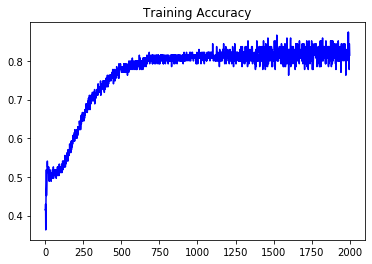

In [15]:
%matplotlib inline
plt.plot(np_acc, color='blue')
plt.title("Training Accuracy")
plt.show()

# Training Loss

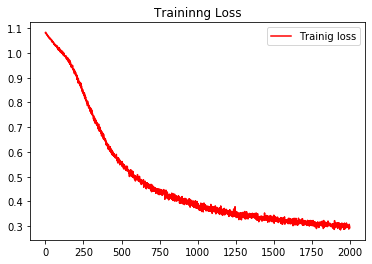

In [16]:
%matplotlib inline
plt.plot(np_loss, color='red', label='Trainig loss')
plt.title("Traininng Loss")
plt.legend()
plt.show()

# Training loss and accuracy curves

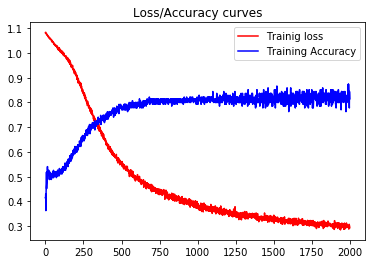

In [17]:
%matplotlib inline
plt.plot(np_loss, color='red', label='Trainig loss')
plt.plot(np_acc, color='blue', label='Training Accuracy')
plt.title("Loss/Accuracy curves")
plt.legend()
plt.show()

# Test Accuracy 

In [22]:
Ypred = predict(model, torch.from_numpy(X_test).float())
acc = np.mean(Y_test == Ypred)
print('Test accuracy: ', acc)

Test accuracy:  0.7333333333333333


# Precision, Recall, F1 Score

In [28]:
from sklearn.metrics import classification_report
target_names = ['data_set-setosa', 'data_set-versicolor', 'data_set-virginica']
print(classification_report(Y_test, Ypred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.60      1.00      0.75         6
 Iris-virginica       0.00      0.00      0.00         4

       accuracy                           0.73        15
      macro avg       0.53      0.67      0.58        15
   weighted avg       0.57      0.73      0.63        15

